## 1. Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
import csv
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits import mplot3d

import streamlit as st

## 2. Data binnen halen

### 2.1 Test csv

In [2]:
# Data binnen halen 
test_df = pd.read_csv('Test.csv')
test_df.head()

,Index,0,1,2,user,experiment
0,0,1.006944,-0.152778,-0.095833,57,28
1,1,1.011111,-0.130556,-0.105556,57,28
2,2,1.011111,-0.130556,-0.105556,57,28
3,3,1.005556,-0.144444,-0.087500,57,28
4,4,0.993056,-0.161111,-0.084722,57,28


In [3]:
# rename test_df
test_df = test_df.rename(columns={"0": "x", "1": "y", "2":"z", "Index":"index"})
test_df.head()

,index,x,y,z,user,experiment
0,0,1.006944,-0.152778,-0.095833,57,28
1,1,1.011111,-0.130556,-0.105556,57,28
2,2,1.011111,-0.130556,-0.105556,57,28
3,3,1.005556,-0.144444,-0.087500,57,28
4,4,0.993056,-0.161111,-0.084722,57,28


### 2.2 Train csv

In [4]:
# data binnen halen 
train_df = pd.read_csv('Train_Acitivity_Tracker_Labeled.csv')
train_df.head()

,Unnamed: 0,0,1,2,user,experiment,index,labels
0,0,1.020833,-0.125000,0.105556,1,1,250,5
1,1,1.025000,-0.125000,0.101389,1,1,251,5
2,2,1.020833,-0.125000,0.104167,1,1,252,5
3,3,1.016667,-0.125000,0.108333,1,1,253,5
4,4,1.018056,-0.127778,0.108333,1,1,254,5


In [5]:
# rename train_df
train_df = train_df.rename(columns={"0": "x", "1": "y", "2":"z", "Unnamed: 0":"Index"})
train_df.head()

,Index,x,y,z,user,experiment,index,labels
0,0,1.020833,-0.125000,0.105556,1,1,250,5
1,1,1.025000,-0.125000,0.101389,1,1,251,5
2,2,1.020833,-0.125000,0.104167,1,1,252,5
3,3,1.016667,-0.125000,0.108333,1,1,253,5
4,4,1.018056,-0.127778,0.108333,1,1,254,5


## 3. Data inspecteren

### Shape

In [6]:
test_df.shape

(70398, 6)

In [7]:
train_df.shape

(745216, 8)

### Data types

In [8]:
test_df.dtypes

index           int64
x             float64
y             float64
z             float64
user            int64
experiment      int64
dtype: object

In [9]:
train_df.dtypes

Index           int64
x             float64
y             float64
z             float64
user            int64
experiment      int64
index           int64
labels          int64
dtype: object

### Informatie

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70398 entries, 0 to 70397
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       70398 non-null  int64  
 1   x           70398 non-null  float64
 2   y           70398 non-null  float64
 3   z           70398 non-null  float64
 4   user        70398 non-null  int64  
 5   experiment  70398 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 3.2 MB


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745216 entries, 0 to 745215
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Index       745216 non-null  int64  
 1   x           745216 non-null  float64
 2   y           745216 non-null  float64
 3   z           745216 non-null  float64
 4   user        745216 non-null  int64  
 5   experiment  745216 non-null  int64  
 6   index       745216 non-null  int64  
 7   labels      745216 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 45.5 MB


## 4. Data analyse

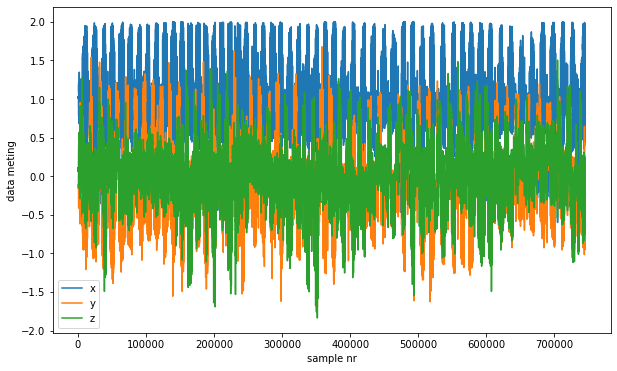

In [12]:
# Gehele dataset 
plt.subplots(figsize=(10,6)) 
plt.plot(train_df['x'], label='x') 
plt.plot(train_df['y'], label='y') 
plt.plot(train_df['z'], label ='z') 
plt.xlabel('sample nr') 
plt.ylabel('data meting') 
plt.legend() 
plt.show()

In [13]:
sorted_labels = train_df['labels'].sort_values()

activiteiten = ['lopen','trap op', 'trap af', 'zitten', 'staan', 'liggen', 'staan naar zitten', 'zitten naar staan', 'zitten naar liggen', 'liggen naar zitten', 'staan naar liggen', 'liggen naar staan']

unique_labels = sorted_labels.unique()



In [14]:
for label in unique_labels :
    df = train_df[train_df['labels'] == label]
    print(np.diff(df[['x', 'y', 'z']]))
    
    

[[-1.20694447  0.09583333]
 [-0.74444446 -0.04722222]
 [-0.8166667  -0.0375    ]
 ...
 [-1.18333338  0.03055555]
 [-1.05277777  0.08750001]
 [-0.99583337  0.14027778]]
[[-1.06111115  0.21805557]
 [-1.00277786  0.18472223]
 [-0.99305554  0.16111111]
 ...
 [-1.20000006  0.14722222]
 [-1.19027782 -0.07916667]
 [-1.22638893 -0.16250003]]
[[-1.07222225  0.19722224]
 [-1.11527782  0.19583335]
 [-1.05972227  0.10277779]
 ...
 [-1.34583334  0.1486111 ]
 [-1.37638895 -0.0125    ]
 [-1.42083341  0.02916666]]
[[-0.76527784  0.20694444]
 [-0.76111117  0.20000002]
 [-0.74027782  0.20277778]
 ...
 [-1.22777787  0.07777779]
 [-1.23472223  0.04305555]
 [-1.20972229  0.0375    ]]
[[-1.1458334   0.23055557]
 [-1.15000007  0.2263889 ]
 [-1.1458334   0.22916667]
 ...
 [-1.06250003  0.04444444]
 [-1.05416667 -0.00277778]
 [-1.07361113 -0.025     ]]
[[ 0.58333335 -0.20277778]
 [ 0.58055557 -0.19444443]
 [ 0.59027779 -0.20694445]
 ...
 [ 0.37083334  0.27083333]
 [ 0.37222223  0.26944444]
 [ 0.39027778  0.263

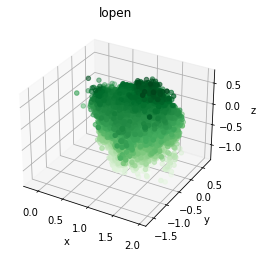

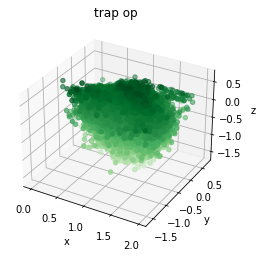

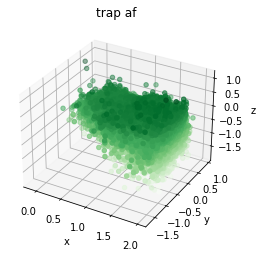

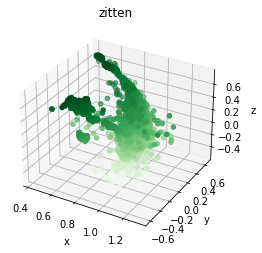

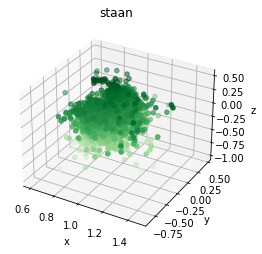

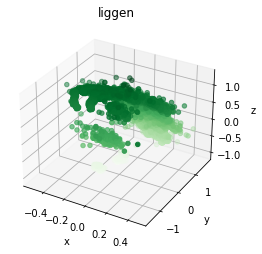

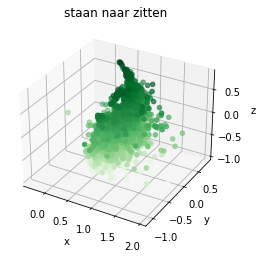

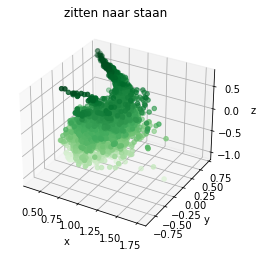

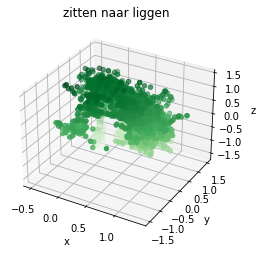

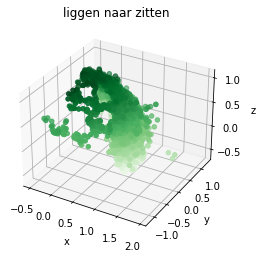

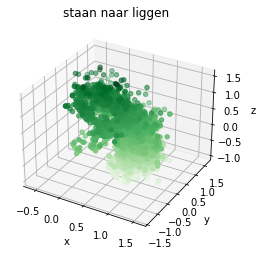

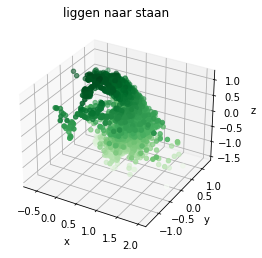

In [15]:
for label in unique_labels :
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plot_df = train_df[train_df['labels'] == label]
    ax.scatter3D(plot_df['x'], plot_df['y'], plot_df['z'], c=plot_df['z'], cmap='Greens')
    plt.title(activiteiten[label-1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

## 5. Model

wij hebben gebruik gemaakt van de k-Nearest Neighbor en hiervoor hebben wij 4 verschillende window functies gebruikt 

### 5.1 Windows functies

#### 5.1.1 Expand functie 

In [16]:
train_df['expand_x']=train_df['x'].expanding().mean()
train_df['expand_y']=train_df['y'].expanding().mean()
train_df['expand_z']=train_df['z'].expanding().mean()

test_df['expand_x']=test_df['x'].expanding().mean()
test_df['expand_y']=test_df['y'].expanding().mean()
test_df['expand_z']=test_df['z'].expanding().mean()

#### 5.1.2 Rolling functie

In [17]:
train_df['roll_x'] = train_df['x'].rolling(window=13).mean()
train_df['roll_y'] = train_df['y'].rolling(window=13).mean()
train_df['roll_z'] = train_df['z'].rolling(window=13).mean()

test_df['roll_x'] = test_df['x'].rolling(window=13).mean()
test_df['roll_y'] = test_df['y'].rolling(window=13).mean()
test_df['roll_z'] = test_df['z'].rolling(window=13).mean()


In [18]:
test_df

,index,x,y,z,user,experiment,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z
0,0,1.006944,-0.152778,-0.095833,57,28,1.006944,-0.152778,-0.095833,NaN,NaN,NaN
1,1,1.011111,-0.130556,-0.105556,57,28,1.009028,-0.141667,-0.100694,NaN,NaN,NaN
2,2,1.011111,-0.130556,-0.105556,57,28,1.009722,-0.137963,-0.102315,NaN,NaN,NaN
3,3,1.005556,-0.144444,-0.087500,57,28,1.008681,-0.139583,-0.098611,NaN,NaN,NaN
4,4,0.993056,-0.161111,-0.084722,57,28,1.005556,-0.143889,-0.095833,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70393,70393,0.880556,-0.390278,-0.156944,61,30,0.804484,0.066465,0.143445,1.197329,-0.345192,-0.314423
70394,70394,0.834722,-0.358333,-0.098611,61,30,0.804485,0.066459,0.143442,1.161752,-0.361325,-0.300214
70395,70395,0.802778,-0.329167,-0.104167,61,30,0.804485,0.066454,0.143438,1.121047,-0.382051,-0.280556
70396,70396,0.770833,-0.287500,-0.098611,61,30,0.804484,0.066448,0.143435,1.072650,-0.397970,-0.258654


#### 5.1.3 Shift functie

In [31]:
# Shift functie gebruiken om een rij toe te voegen boven aan, voor de diff functie 
# Shift kolommen toevoegen
train_df['shift_x'] = train_df['x'].shift(13)
train_df['shift_y'] = train_df['y'].shift(13)
train_df['shift_z'] = train_df['z'].shift(13)

test_df['shift_x'] = test_df['x'].shift(13)
test_df['shift_y'] = test_df['y'].shift(13)
test_df['shift_z'] = test_df['z'].shift(13)
train_df.head(20)

,Index,x,y,z,user,experiment,index,labels,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z,shift_x,shift_y,shift_z,diff_x,diff_y,diff_z
0,0,1.020833,-0.125000,0.105556,1,1,250,5,1.020833,-0.125000,0.105556,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
1,1,1.025000,-0.125000,0.101389,1,1,251,5,1.022917,-0.125000,0.103472,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
2,2,1.020833,-0.125000,0.104167,1,1,252,5,1.022222,-0.125000,0.103704,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
3,3,1.016667,-0.125000,0.108333,1,1,253,5,1.020833,-0.125000,0.104861,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
4,4,1.018056,-0.127778,0.108333,1,1,254,5,1.020278,-0.125556,0.105556,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
5,5,1.018056,-0.129167,0.104167,1,1,255,5,1.019907,-0.126157,0.105324,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
6,6,1.019445,-0.125000,0.101389,1,1,256,5,1.019841,-0.125992,0.104762,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
7,7,1.016667,-0.123611,0.097222,1,1,257,5,1.019445,-0.125694,0.103819,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
8,8,1.020833,-0.127778,0.098611,1,1,258,5,1.019599,-0.125926,0.103241,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006
9,9,1.019445,-0.115278,0.094444,1,1,259,5,1.019583,-0.124861,0.102361,0.806651,0.029735,0.082373,NaN,NaN,NaN,-2.982062e-08,-0.000003,-0.000006


#### 5.1.4 Diff functie

In [32]:
# Difference function om het verschil tussen de vorige waarde en de huidige waarde te berekenen.
train_df['diff_x'] = train_df['x'] - train_df['shift_x']
train_df['diff_y'] = train_df['y'] - train_df['shift_y']
train_df['diff_z'] = train_df['z'] - train_df['shift_z']


test_df['diff_x'] = test_df['x'] - test_df['shift_x']
test_df['diff_y'] = test_df['y'] - test_df['shift_y']
test_df['diff_z'] = test_df['z'] - test_df['shift_z']

train_df.head(20)

,Index,x,y,z,user,experiment,index,labels,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z,shift_x,shift_y,shift_z,diff_x,diff_y,diff_z
0,0,1.020833,-0.125000,0.105556,1,1,250,5,1.020833,-0.125000,0.105556,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.025000,-0.125000,0.101389,1,1,251,5,1.022917,-0.125000,0.103472,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.020833,-0.125000,0.104167,1,1,252,5,1.022222,-0.125000,0.103704,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.016667,-0.125000,0.108333,1,1,253,5,1.020833,-0.125000,0.104861,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.018056,-0.127778,0.108333,1,1,254,5,1.020278,-0.125556,0.105556,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1.018056,-0.129167,0.104167,1,1,255,5,1.019907,-0.126157,0.105324,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1.019445,-0.125000,0.101389,1,1,256,5,1.019841,-0.125992,0.104762,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1.016667,-0.123611,0.097222,1,1,257,5,1.019445,-0.125694,0.103819,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1.020833,-0.127778,0.098611,1,1,258,5,1.019599,-0.125926,0.103241,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1.019445,-0.115278,0.094444,1,1,259,5,1.019583,-0.124861,0.102361,0.806651,0.029735,0.082373,NaN,NaN,NaN,NaN,NaN,NaN


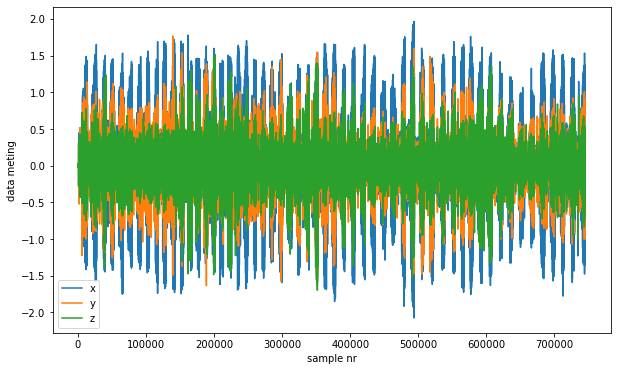

In [21]:
# diff dataset (spreiding is kleiner)
plt.subplots(figsize=(10,6)) 
plt.plot(train_df['diff_x'], label='x') 
plt.plot(train_df['diff_y'], label='y') 
plt.plot(train_df['diff_z'], label ='z') 
plt.xlabel('sample nr') 
plt.ylabel('data meting') 
plt.legend() 
plt.show()

In [22]:
train_df.head(20)

,Index,x,y,z,user,experiment,index,labels,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z,shift_x,shift_y,shift_z,diff_x,diff_y,diff_z
0,0,1.020833,-0.125000,0.105556,1,1,250,5,1.020833,-0.125000,0.105556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.025000,-0.125000,0.101389,1,1,251,5,1.022917,-0.125000,0.103472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.020833,-0.125000,0.104167,1,1,252,5,1.022222,-0.125000,0.103704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.016667,-0.125000,0.108333,1,1,253,5,1.020833,-0.125000,0.104861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.018056,-0.127778,0.108333,1,1,254,5,1.020278,-0.125556,0.105556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1.018056,-0.129167,0.104167,1,1,255,5,1.019907,-0.126157,0.105324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1.019445,-0.125000,0.101389,1,1,256,5,1.019841,-0.125992,0.104762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1.016667,-0.123611,0.097222,1,1,257,5,1.019445,-0.125694,0.103819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1.020833,-0.127778,0.098611,1,1,258,5,1.019599,-0.125926,0.103241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1.019445,-0.115278,0.094444,1,1,259,5,1.019583,-0.124861,0.102361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
test_df.head(20)

,index,x,y,z,user,experiment,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z,shift_x,shift_y,shift_z,diff_x,diff_y,diff_z
0,0,1.006944,-0.152778,-0.095833,57,28,1.006944,-0.152778,-0.095833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.011111,-0.130556,-0.105556,57,28,1.009028,-0.141667,-0.100694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.011111,-0.130556,-0.105556,57,28,1.009722,-0.137963,-0.102315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.005556,-0.144444,-0.087500,57,28,1.008681,-0.139583,-0.098611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.993056,-0.161111,-0.084722,57,28,1.005556,-0.143889,-0.095833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0.993056,-0.168056,-0.094444,57,28,1.003472,-0.147917,-0.095602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0.995833,-0.177778,-0.087500,57,28,1.002381,-0.152183,-0.094444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,0.998611,-0.188889,-0.086111,57,28,1.001910,-0.156771,-0.093403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,0.998611,-0.180556,-0.083333,57,28,1.001543,-0.159414,-0.092284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1.004167,-0.201389,-0.084722,57,28,1.001806,-0.163611,-0.091528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.1.5 NaN opvullen

train_vorige = train_df.iloc[15:30]
train_vorige = train_vorige.reset_index()

test_vorige = test_df.iloc[15:30]
test_vorige = test_vorige.reset_index()

#### Train_df

In [24]:
# NaN expand, roll en shift opgevuld met de rijen eronder 
# NaN diff opgevuld met het gemiddelde 
train_df['expand_x'].fillna(train_df['expand_x'].mean(), inplace=True)
train_df['expand_y'].fillna(train_df['expand_y'].mean(), inplace=True)
train_df['expand_z'].fillna(train_df['expand_z'].mean(), inplace=True)

train_df['roll_x'].fillna(train_df['roll_x'].mean(), inplace=True)
train_df['roll_y'].fillna(train_df['roll_y'].mean(), inplace=True)
train_df['roll_z'].fillna(train_df['roll_z'].mean(), inplace=True)

train_df['shift_x'].fillna(train_df['shift_x'].mean(), inplace=True)
train_df['shift_y'].fillna(train_df['shift_y'].mean(), inplace=True)
train_df['shift_z'].fillna(train_df['shift_z'].mean(), inplace=True)

train_df['diff_x'].fillna(train_df['diff_x'].mean(), inplace=True)
train_df['diff_y'].fillna(train_df['diff_y'].mean(), inplace=True)
train_df['diff_z'].fillna(train_df['diff_z'].mean(), inplace=True)


In [25]:
train_df

,Index,x,y,z,user,experiment,index,labels,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z,shift_x,shift_y,shift_z,diff_x,diff_y,diff_z
0,0,1.020833,-0.125000,0.105556,1,1,250,5,1.020833,-0.125000,0.105556,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
1,1,1.025000,-0.125000,0.101389,1,1,251,5,1.022917,-0.125000,0.103472,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
2,2,1.020833,-0.125000,0.104167,1,1,252,5,1.022222,-0.125000,0.103704,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
3,3,1.016667,-0.125000,0.108333,1,1,253,5,1.020833,-0.125000,0.104861,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
4,4,1.018056,-0.127778,0.108333,1,1,254,5,1.020278,-0.125556,0.105556,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745211,745211,0.636111,-0.433333,-0.065278,56,28,19639,2,0.806653,0.029733,0.082373,1.029060,-0.315491,-0.196474,0.781944,-0.333333,-0.072222,-1.458334e-01,-0.100000,0.006944
745212,745212,0.690278,-0.431944,-0.108333,56,28,19640,2,0.806653,0.029733,0.082372,1.018803,-0.320299,-0.200534,0.823611,-0.369444,-0.055556,-1.333333e-01,-0.062500,-0.052778
745213,745213,0.829167,-0.370833,-0.223611,56,28,19641,2,0.806653,0.029732,0.082372,1.016880,-0.321047,-0.212714,0.854167,-0.361111,-0.065278,-2.499996e-02,-0.009722,-0.158333
745214,745214,0.915278,-0.275000,-0.354167,56,28,19642,2,0.806653,0.029732,0.082371,1.015171,-0.319231,-0.234615,0.937500,-0.298611,-0.069444,-2.222227e-02,0.023611,-0.284722


#### Test_df

In [26]:
# NaN expand, roll en shift opgevuld met de rijen eronder 
# NaN diff opgevuld met het gemiddelde 
test_df['expand_x'].fillna(test_df['expand_x'].mean(), inplace=True)
test_df['expand_y'].fillna(test_df['expand_y'].mean(), inplace=True)
test_df['expand_z'].fillna(test_df['expand_z'].mean(), inplace=True)

test_df['roll_x'].fillna(test_df['roll_x'].mean(), inplace=True)
test_df['roll_y'].fillna(test_df['roll_y'].mean(), inplace=True)
test_df['roll_z'].fillna(test_df['roll_z'].mean(), inplace=True)

test_df['shift_x'].fillna(test_df['shift_x'].mean(), inplace=True)
test_df['shift_y'].fillna(test_df['shift_y'].mean(), inplace=True)
test_df['shift_z'].fillna(test_df['shift_z'].mean(), inplace=True)

test_df['diff_x'].fillna(test_df['diff_x'].mean(), inplace=True)
test_df['diff_y'].fillna(test_df['diff_y'].mean(), inplace=True)
test_df['diff_z'].fillna(test_df['diff_z'].mean(), inplace=True)

In [27]:
train_df

,Index,x,y,z,user,experiment,index,labels,expand_x,expand_y,expand_z,roll_x,roll_y,roll_z,shift_x,shift_y,shift_z,diff_x,diff_y,diff_z
0,0,1.020833,-0.125000,0.105556,1,1,250,5,1.020833,-0.125000,0.105556,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
1,1,1.025000,-0.125000,0.101389,1,1,251,5,1.022917,-0.125000,0.103472,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
2,2,1.020833,-0.125000,0.104167,1,1,252,5,1.022222,-0.125000,0.103704,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
3,3,1.016667,-0.125000,0.108333,1,1,253,5,1.020833,-0.125000,0.104861,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
4,4,1.018056,-0.127778,0.108333,1,1,254,5,1.020278,-0.125556,0.105556,0.806651,0.029735,0.082373,0.806650,0.029737,0.082377,-2.982062e-08,-0.000003,-0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745211,745211,0.636111,-0.433333,-0.065278,56,28,19639,2,0.806653,0.029733,0.082373,1.029060,-0.315491,-0.196474,0.781944,-0.333333,-0.072222,-1.458334e-01,-0.100000,0.006944
745212,745212,0.690278,-0.431944,-0.108333,56,28,19640,2,0.806653,0.029733,0.082372,1.018803,-0.320299,-0.200534,0.823611,-0.369444,-0.055556,-1.333333e-01,-0.062500,-0.052778
745213,745213,0.829167,-0.370833,-0.223611,56,28,19641,2,0.806653,0.029732,0.082372,1.016880,-0.321047,-0.212714,0.854167,-0.361111,-0.065278,-2.499996e-02,-0.009722,-0.158333
745214,745214,0.915278,-0.275000,-0.354167,56,28,19642,2,0.806653,0.029732,0.082371,1.015171,-0.319231,-0.234615,0.937500,-0.298611,-0.069444,-2.222227e-02,0.023611,-0.284722


### Model code

In [28]:
x=train_df[['x', 'y', 'z', 'expand_x', 'expand_y', 'expand_z', 'roll_x', 'roll_y', 'roll_z', 'shift_x', 'shift_y', 'shift_z', 'diff_x', 'diff_y', 'diff_z']]  # Features
y=train_df['labels']  # Labels
x_test_set = test_df[['x', 'y', 'z', 'expand_x', 'expand_y', 'expand_z', 'roll_x', 'roll_y', 'roll_z', 'shift_x', 'shift_y', 'shift_z', 'diff_x', 'diff_y', 'diff_z']]

#scaler = StandardScaler()

#for feature in x:
    #train_df[feature] = scaler.fit_transform(train_df[feature])

neigh = KNeighborsClassifier(n_neighbors=220, weights='distance', algorithm='auto').fit(x, y)

y_pred = neigh.predict(x_test_set)

test_df['labels'] = y_pred



### Voorspellings CSV maken 

In [29]:
prediction_df = test_df[['index', 'labels']]
prediction_df.to_csv('voorspelling.csv', index=False)